Train shape: (614, 13)
Test shape: (367, 12)

--- Train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

--- Missing Values ---
Credit_History       50

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


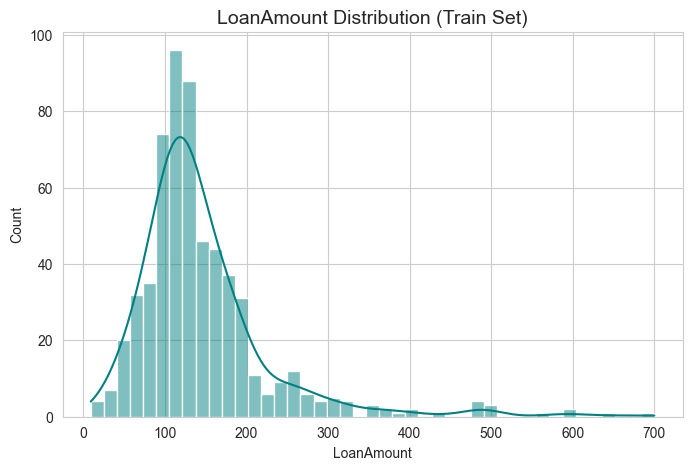

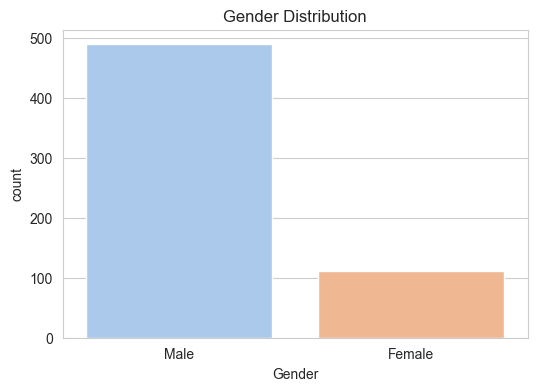

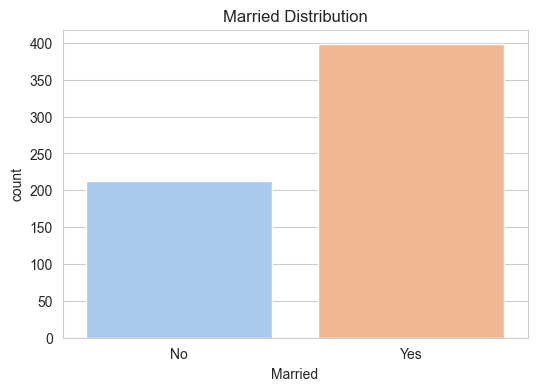

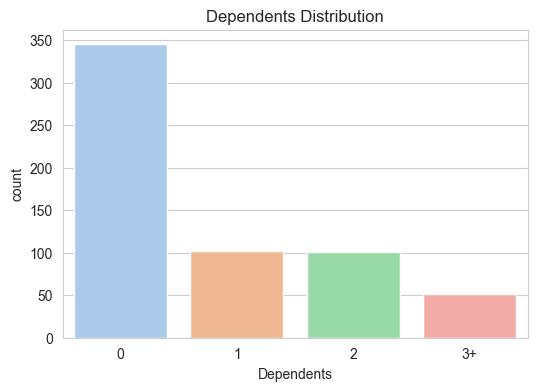

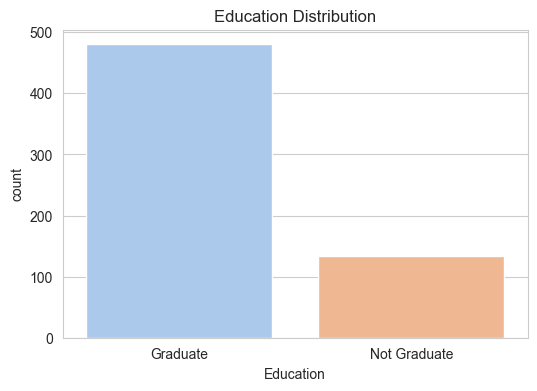

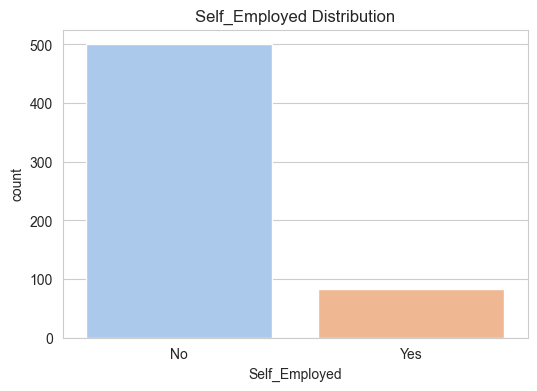

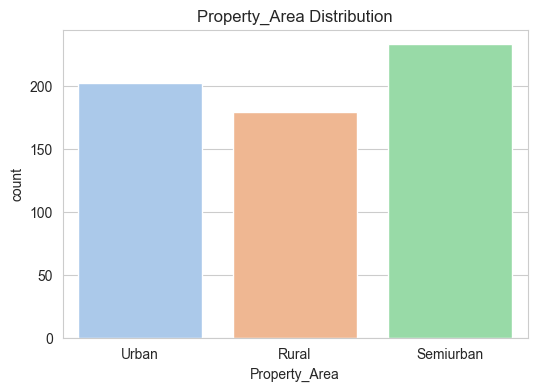

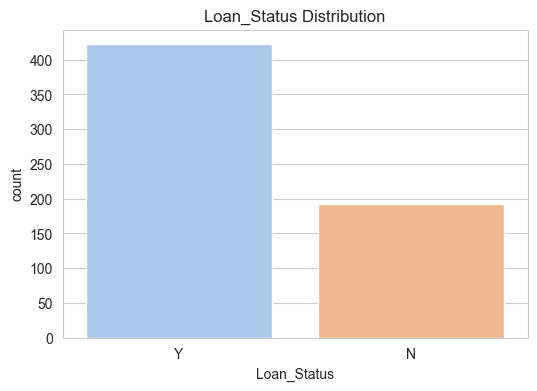

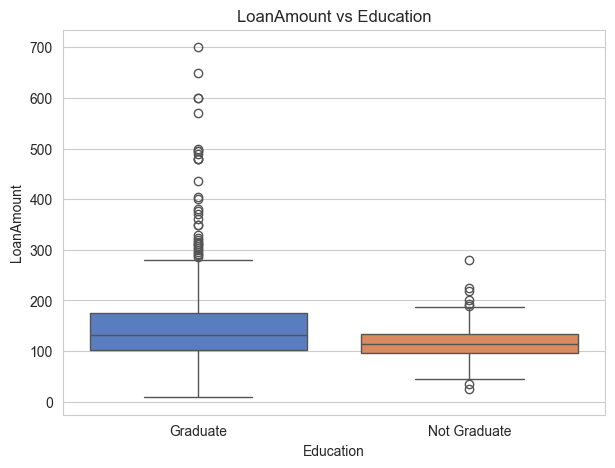

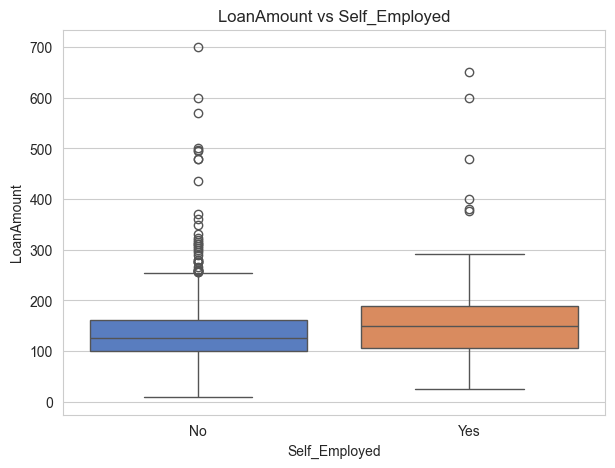

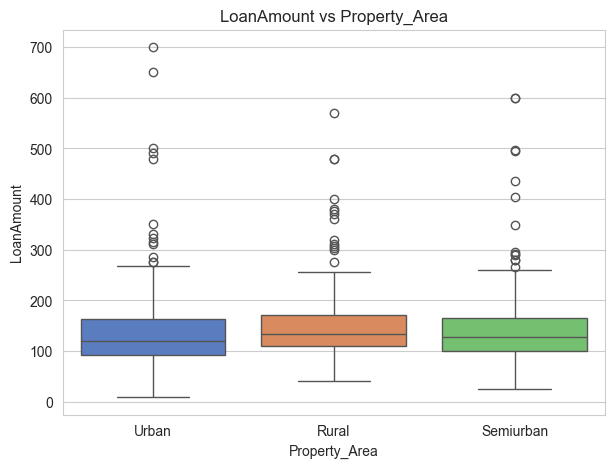

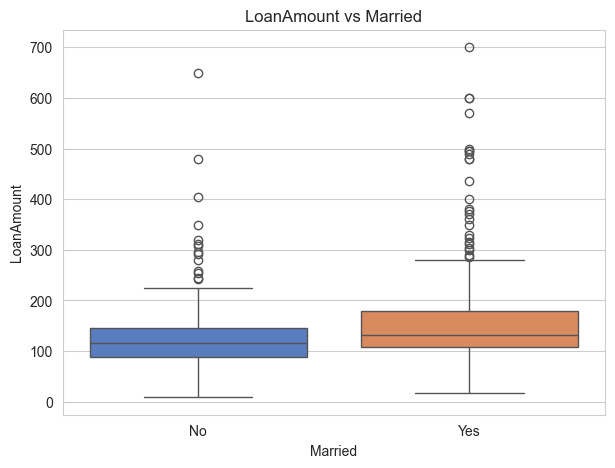

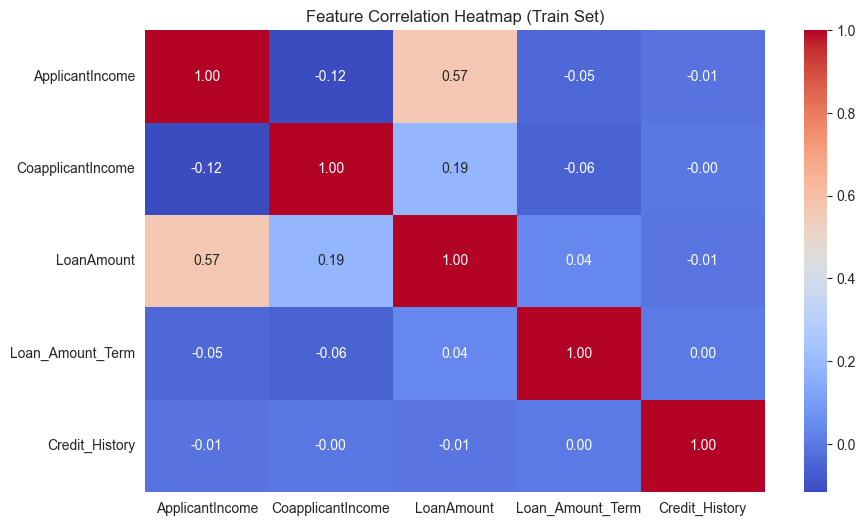

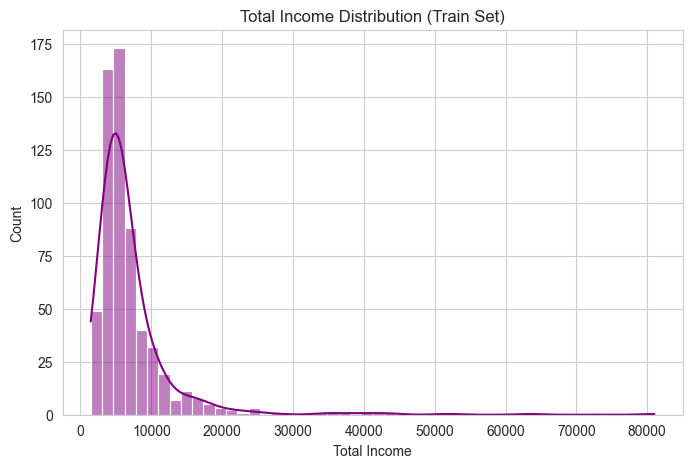

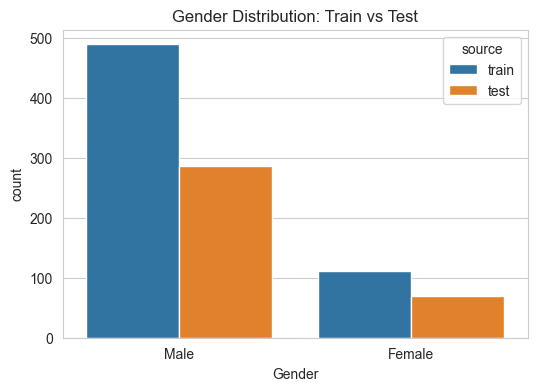

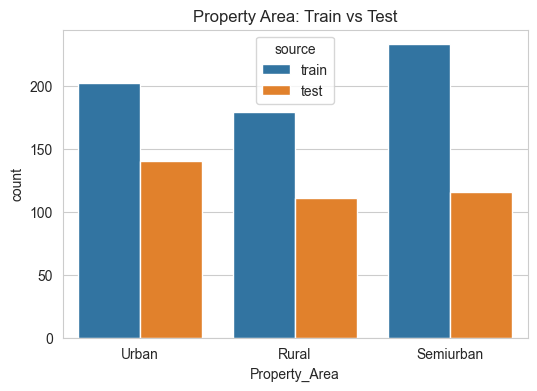

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set_style("whitegrid")

# === Load Datasets ===
train_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML\Loan_Price_Prediction\data\train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML\Loan_Price_Prediction\data\test_Y3wMUE5_7gLdaTN.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# === Basic Info ===
print("\n--- Train Info ---")
train_df.info()

print("\n--- Missing Values ---")
print(train_df.isnull().sum().sort_values(ascending=False))

print("\n--- Descriptive Stats ---")
display(train_df.describe().T)

# === LoanAmount Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(train_df['LoanAmount'], kde=True, color='teal')
plt.title("LoanAmount Distribution (Train Set)", fontsize=14)
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()

# === Categorical Feature Distributions ===
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_df, palette='pastel')
    plt.title(f"{col} Distribution")
    plt.show()

# === Boxplots: LoanAmount vs Categories ===
box_cols = ['Education', 'Self_Employed', 'Property_Area', 'Married']

for col in box_cols:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=col, y='LoanAmount', data=train_df, palette='muted')
    plt.title(f"LoanAmount vs {col}")
    plt.show()

# === Correlation Heatmap ===
plt.figure(figsize=(10, 6))
numeric_df = train_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Heatmap (Train Set)")
plt.show()

# === Feature Engineering: Total Income ===
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

plt.figure(figsize=(8, 5))
sns.histplot(train_df['Total_Income'], kde=True, color='purple')
plt.title("Total Income Distribution (Train Set)")
plt.xlabel("Total Income")
plt.show()

# === Optional: Compare Train vs Test for Drift ===
train_df['source'] = 'train'
test_df['source'] = 'test'

combined = pd.concat([train_df, test_df], ignore_index=True)

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='source', data=combined)
plt.title("Gender Distribution: Train vs Test")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Property_Area', hue='source', data=combined)
plt.title("Property Area: Train vs Test")
plt.show()
